# Kerakli kutubxonalarni chaqirib olish

In [ ]:
import fastai
import torch
from fastai.vision.all import *
from tqdm import tqdm
from torch.utils.data import dataloader

# Google drivega yuklangan images fayllarini mazkur faylga chaqirib olish

In [ ]:
!git clone https://github.com/jahongirkb/gender_classification.git

Cloning into 'gender_classification'...
remote: Enumerating objects: 2315, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 2315 (delta 0), reused 3 (delta 0), pack-reused 2312
Receiving objects: 100% (2315/2315), 68.36 MiB | 16.14 MiB/s, done.
Updating files: 100% (2308/2308), done.


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Train qilish uchun faylni datasetdan ajratib olish

In [ ]:
path = Path('/content/gender_classification/gender_dataset/gender_train_dataset')
fls = get_image_files(path)

# DataLoader yaratish hamda modelni train qilish jarayoni

In [ ]:
# Datablock
gender = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.1, seed=7),
    get_y = parent_label,
    item_tfms = Resize(128),
    # batch_tfms=[Normalize.from_stats(*imagenet_stats), WaveletTransform()]
)

# Data loaders
dls = gender.dataloaders(path)

# Train
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(5) # 5 martta validation qiladi.

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 126MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.709755,0.383077,0.855769,02:05


epoch,train_loss,valid_loss,accuracy,time
0,0.393073,0.210473,0.913462,03:01
1,0.252796,0.191818,0.937500,03:03
2,0.155560,0.119731,0.942308,02:59
3,0.105098,0.113306,0.966346,03:00
4,0.068242,0.108142,0.966346,02:59


# Confusion matrix grafigini chizish

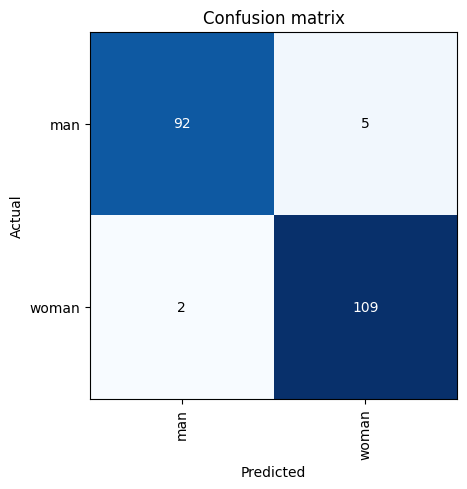

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# train datasetdagi 5ta eng katta xatolik qaytargan rasmlarni chiqarish

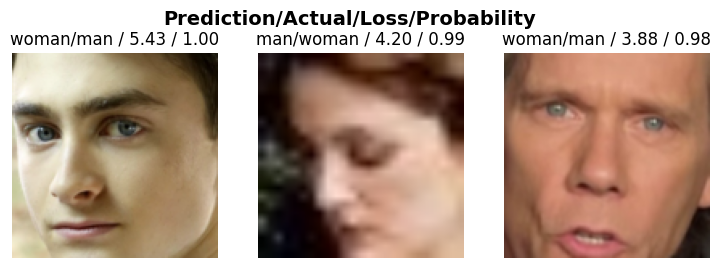

In [ ]:
interp.plot_top_losses(3)

# O'qitilgan modelni .pkl formatda saqlab olish

In [ ]:
learn.export('gender.pkl')

# Modelni sinab ko'rish uchun yuklab olish

In [ ]:
model = load_learner('/content/gender.pkl')

# Button yaratish uchun widgets kutubxonasi

In [ ]:
from ipywidgets import widgets
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

# Yuklab olingan rasmni model orqali bashorat qilish

In [ ]:
# from PIL import Image
# img = Image.open("/content/Malignant case (3).jpg")
# img

In [ ]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = model.predict(img)
print(f'Bashorat: {pred}')
print(f'Extimolligi: {probs[pred_id]*100:.1f} %')
img